In [3]:
path = 'world_bank_data_2025.csv'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [17]:
df = pd.read_csv(path)
print(df.head(10))

  country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
0        Aruba         aw  2010           2.078141       2.453597e+09   
1        Aruba         aw  2011           4.316297       2.637859e+09   
2        Aruba         aw  2012           0.627472       2.615208e+09   
3        Aruba         aw  2013          -2.372065       2.727850e+09   
4        Aruba         aw  2014           0.421441       2.790850e+09   
5        Aruba         aw  2015           0.474764       2.962907e+09   
6        Aruba         aw  2016          -0.931196       2.983635e+09   
7        Aruba         aw  2017          -1.028282       3.092429e+09   
8        Aruba         aw  2018           3.626041       3.276184e+09   
9        Aruba         aw  2019           4.257462       3.395799e+09   

   GDP per Capita (Current USD)  Unemployment Rate (%)  \
0                  24093.140151                    NaN   
1                  25712.384302                    NaN   
2                  251

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

In [21]:
df_clean = df.dropna(subset=['Inflation (CPI %)', 'GDP (Current USD)','GDP per Capita (Current USD)','Unemployment Rate (%)','Interest Rate (Real, %)','Inflation (GDP Deflator, %)','GDP Growth (% Annual)','Current Account Balance (% GDP)','Government Expense (% of GDP)','Government Expense (% of GDP)','Government Revenue (% of GDP)','Tax Revenue (% of GDP)','Gross National Income (USD)','Public Debt (% of GDP)'])

# Show result
print(df_clean.head())

   country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
49      Albania         al  2011           3.428071       1.289076e+10   
50      Albania         al  2012           2.031593       1.231983e+10   
51      Albania         al  2013           1.937621       1.277622e+10   
52      Albania         al  2014           1.625865       1.322815e+10   
53      Albania         al  2015           3.501208       1.138685e+10   

    GDP per Capita (Current USD)  Unemployment Rate (%)  \
49                   4437.141161                 13.481   
50                   4247.631343                 13.376   
51                   4413.063383                 15.866   
52                   4578.633208                 18.055   
53                   3952.803574                 17.193   

    Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
49                 9.888462                     2.314744   
50                 9.736112                     1.042715   
51                 9

In [25]:
len(df_clean)

535

In [31]:
cols_to_convert = [
    'Inflation (CPI %)',
    'GDP (Current USD)',
    'GDP per Capita (Current USD)',
    'Unemployment Rate (%)',
    'Interest Rate (Real, %)',
    'Inflation (GDP Deflator, %)',
    'GDP Growth (% Annual)',
    'Current Account Balance (% GDP)',
    'Government Expense (% of GDP)',
    'Government Revenue (% of GDP)',
    'Tax Revenue (% of GDP)',
    'Gross National Income (USD)',
    'Public Debt (% of GDP)'
]

df_clean[cols_to_convert] = df_clean[cols_to_convert].astype(int)

# Step 5: Show the first few rows
print(df_clean.head())

# Step 6: Total number of rows after cleaning
print("Total rows after cleaning:", len(df_clean))

   country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
49      Albania         al  2011                  3        -2147483648   
50      Albania         al  2012                  2        -2147483648   
51      Albania         al  2013                  1        -2147483648   
52      Albania         al  2014                  1        -2147483648   
53      Albania         al  2015                  3        -2147483648   

    GDP per Capita (Current USD)  Unemployment Rate (%)  \
49                          4437                     13   
50                          4247                     13   
51                          4413                     15   
52                          4578                     18   
53                          3952                     17   

    Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
49                        9                            2   
50                        9                            1   
51                  

C:\Users\second\AppData\Local\Temp\ipykernel_11344\67632622.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols_to_convert] = df_clean[cols_to_convert].astype(int)


In [39]:
df_clean[["Inflation (CPI %)"]] = np.round(df_clean[["Inflation (CPI %)"]],2)
print(df_clean.head())

   country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
49      Albania         al  2011                  3        -2147483648   
50      Albania         al  2012                  2        -2147483648   
51      Albania         al  2013                  1        -2147483648   
52      Albania         al  2014                  1        -2147483648   
53      Albania         al  2015                  3        -2147483648   

    GDP per Capita (Current USD)  Unemployment Rate (%)  \
49                          4437                     13   
50                          4247                     13   
51                          4413                     15   
52                          4578                     18   
53                          3952                     17   

    Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
49                        9                            2   
50                        9                            1   
51                  

C:\Users\second\AppData\Local\Temp\ipykernel_11344\2929093948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[["Inflation (CPI %)"]] = np.round(df_clean[["Inflation (CPI %)"]],2)


<Axes: xlabel='GDP (Current USD)', ylabel='Inflation (CPI %)'>

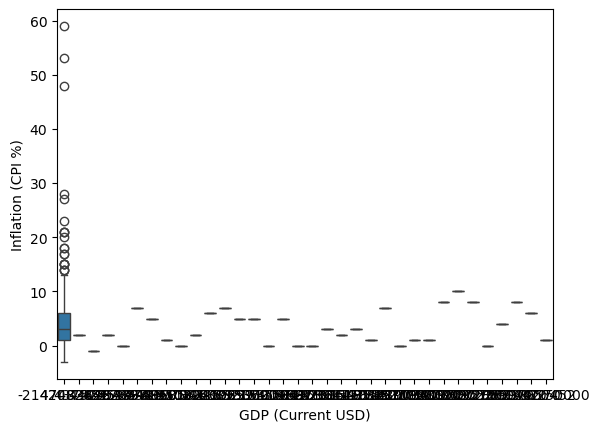

In [49]:
sns.boxplot(x="GDP (Current USD)", y="Inflation (CPI %)", data=df_clean)

In [51]:
# Create correlation matrix for selected columns
correlation_matrix = df_clean[cols_to_convert].corr()

# Display the matrix
print(correlation_matrix)


                                 Inflation (CPI %)  GDP (Current USD)  \
Inflation (CPI %)                         1.000000          -0.038128   
GDP (Current USD)                        -0.038128           1.000000   
GDP per Capita (Current USD)             -0.251904          -0.153240   
Unemployment Rate (%)                    -0.044595          -0.135721   
Interest Rate (Real, %)                  -0.197205           0.055834   
Inflation (GDP Deflator, %)               0.830044          -0.052172   
GDP Growth (% Annual)                     0.004135          -0.013413   
Current Account Balance (% GDP)          -0.205758          -0.169004   
Government Expense (% of GDP)             0.012563           0.006532   
Government Revenue (% of GDP)             0.014182          -0.004074   
Tax Revenue (% of GDP)                   -0.022059           0.146141   
Gross National Income (USD)              -0.042587           0.929533   
Public Debt (% of GDP)                   -0.081378 

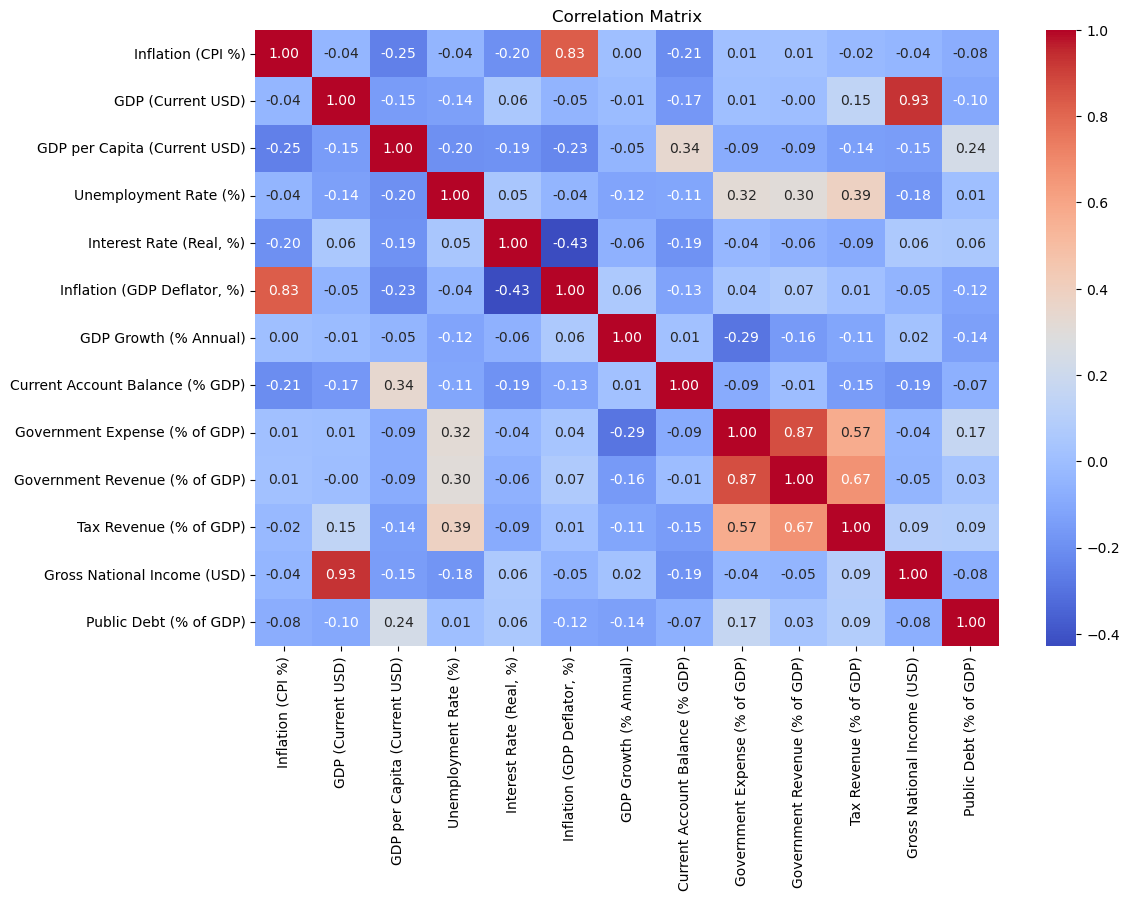

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [68]:
from sklearn.linear_model import LinearRegression
Y = df_clean[['Inflation (CPI %)']]
X = df_clean[['GDP (Current USD)','GDP per Capita (Current USD)','Unemployment Rate (%)','Interest Rate (Real, %)','Inflation (GDP Deflator, %)','GDP Growth (% Annual)','Current Account Balance (% GDP)','Government Expense (% of GDP)','Government Expense (% of GDP)','Government Revenue (% of GDP)','Tax Revenue (% of GDP)','Gross National Income (USD)','Public Debt (% of GDP)']]
model = LinearRegression()
model.fit(X, Y)

# Predict
y_pred = model.predict(X)

print("Intercept:", model.intercept_[0])
print("Coefficients:")
print(pd.Series(model.coef_[0], index=X.columns))

# Optional: model score
print("\nR2 score:", model.score(X, Y))

Intercept: 0.6144775413321741
Coefficients:
GDP (Current USD)                  2.960591e-10
GDP per Capita (Current USD)      -9.582207e-07
Unemployment Rate (%)             -1.993505e-02
Interest Rate (Real, %)            1.323949e-01
Inflation (GDP Deflator, %)        7.346501e-01
GDP Growth (% Annual)             -5.857060e-02
Current Account Balance (% GDP)   -4.254017e-02
Government Expense (% of GDP)      1.477304e-02
Government Expense (% of GDP)      1.477304e-02
Government Revenue (% of GDP)     -6.509075e-02
Tax Revenue (% of GDP)             1.320271e-02
Gross National Income (USD)       -4.568720e-10
Public Debt (% of GDP)             1.166751e-05
dtype: float64

R2 score: 0.7278456129451047


In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, Y)


LinearRegression()

In [76]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, Y)


Ridge()

In [78]:
print(r2_score(y_test,yhat))

0.5218301033206103


In [90]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_scaled, Y)
y_pred = ridge.predict(X_scaled)
print("R2 score:", r2_score(Y, y_pred))

R2 score: 0.7278398169496463
